# Solar Power Generation Forecasting

Forecasting solar power generation is crucial for managing and planning energy resources efficiently. This notebook outlines the steps for analyzing and forecasting solar power generation using time series analysis, specifically focusing on SARIMAX and GARCH models for handling time series data and volatility.


In [12]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from sklearn.metrics import mean_squared_error, mean_absolute_error
from arch import arch_model


## Data Loading

The first step is to load the solar power generation data, which includes timestamps and power output in MW (Megawatts).


In [13]:
# Load the data
#file_path = "path_to_your_data.csv"  # Update this to your data file path
data = pd.read_csv("D:\Rby's Folder\Assignments\Data\California\Data set 3\generation.csv")
data['Timestamp'] = pd.to_datetime(data['LocalTime'])
data.drop(columns=['LocalTime'], inplace=True)
data['DateStamp'] = data['Timestamp'].dt.date


C:\Users\lenovo\AppData\Local\Temp\ipykernel_5464\2552342670.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Timestamp'] = pd.to_datetime(data['LocalTime'])


## Data Preprocessing

Data preprocessing involves handling missing values, converting data types, and creating necessary features.


In [14]:
# Handling missing values and creating necessary features
# Assuming no missing values for simplicity; apply appropriate techniques if there are any.
grouped_data = pd.DataFrame(data.groupby(by="DateStamp").mean()['Power(MW)'])
grouped_data.index = pd.to_datetime(grouped_data.index)


## Exploratory Data Analysis (EDA)

Visualizing the data to understand its characteristics, including trends and seasonality.


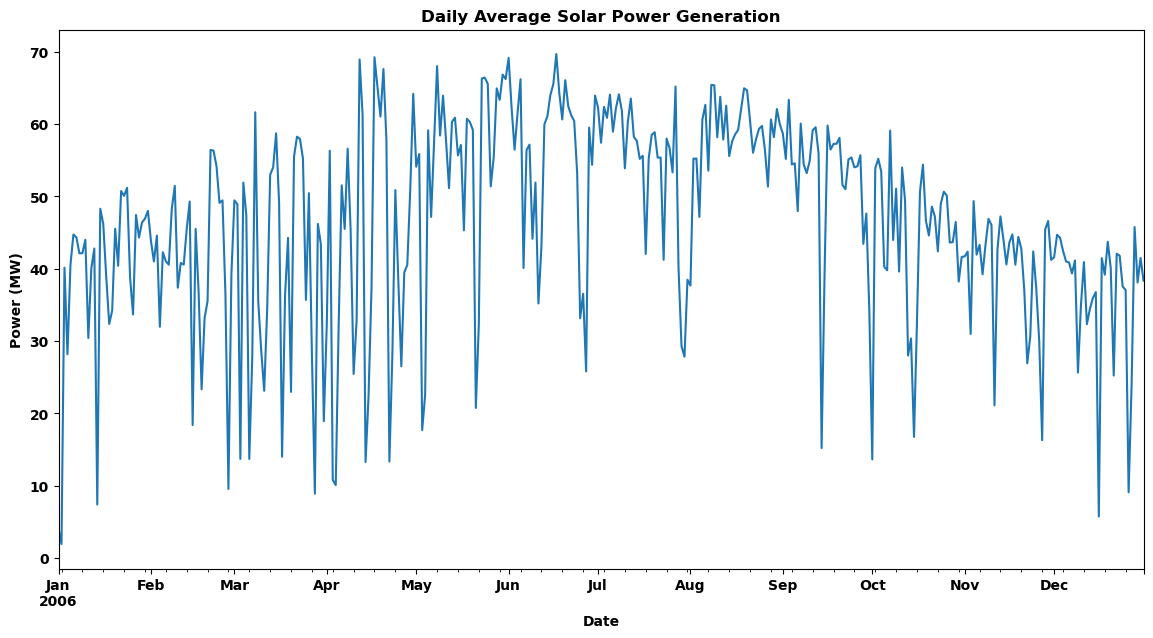

In [15]:
# Plotting the power generation over time
grouped_data['Power(MW)'].plot(figsize=(14, 7))
plt.title('Daily Average Solar Power Generation')
plt.ylabel('Power (MW)')
plt.xlabel('Date')
plt.show()


## Stationarity Tests

Checking for stationarity in the time series data using the Augmented Dickey-Fuller (ADF) test.


In [16]:
# ADF test
adf_result = adfuller(grouped_data['Power(MW)'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')


ADF Statistic: -2.697500024623968
p-value: 0.07447187394858387


## Seasonality and Trend Analysis

Analyzing seasonality and trends to inform model selection and feature engineering.


In [17]:
grouped_data

,Power(MW)
DateStamp,
2006-01-01,3.972917
2006-01-02,1.911458
2006-01-03,40.142361
2006-01-04,28.165972
2006-01-05,40.516667
...,...
2006-12-27,23.952431
2006-12-28,45.760417
2006-12-29,38.087500


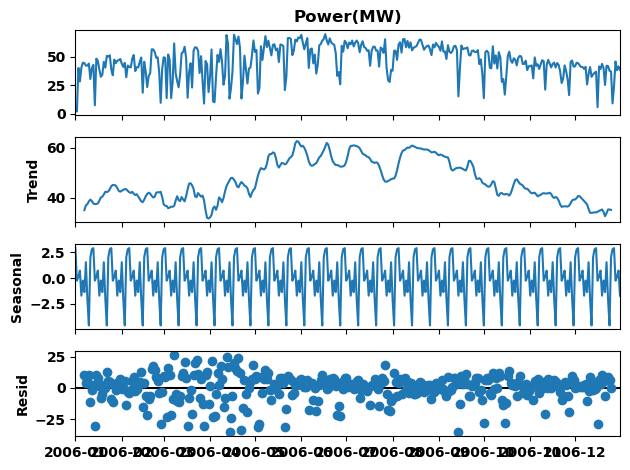

In [18]:
# Decomposing time series
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(grouped_data['Power(MW)'], model='additive', period=12)
decomposition.plot()
plt.show()


## Model Fitting (SARIMAX)

Fitting a Seasonal ARIMA (SARIMAX) model to the time series data, including external variables if applicable.


In [19]:
# SARIMAX model fitting (example parameters; adjust based on your analysis)
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarimax_model = SARIMAX(grouped_data['Power(MW)'], order=(1, 0, 2), seasonal_order=(0, 1, 2, 12))
sarimax_result = sarimax_model.fit()


c:\Users\lenovo\anaconda3\envs\Dissertation\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\lenovo\anaconda3\envs\Dissertation\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


## Outlier Detection and Handling

Identifying and handling outliers that may affect model performance.


In [20]:
# Outlier detection (simplified approach)
residuals = sarimax_result.resid
outliers = residuals[abs(residuals) > 2 * residuals.std()]
grouped_data['is_outlier'] = 0
grouped_data.loc[outliers.index, 'is_outlier'] = 1


## Volatility Modeling with GARCH

Modeling volatility in the time series data using GARCH, essential for understanding risk and variability in power generation.


In [21]:
# Fitting a GARCH model
garch = arch_model(sarimax_result.resid, vol='Garch', p=1, q=1)
garch_result = garch.fit(disp='off')
print(garch_result.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1424.43
Distribution:                  Normal   AIC:                           2856.87
Method:            Maximum Likelihood   BIC:                           2872.46
                                        No. Observations:                  365
Date:                Tue, Feb 27 2024   Df Residuals:                      364
Time:                        14:25:57   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.4482      0.566     -0.791      0.429 [ -1.558,  0.66

## Forecasting and Evaluation

Forecasting future power generation and evaluating the model's performance.


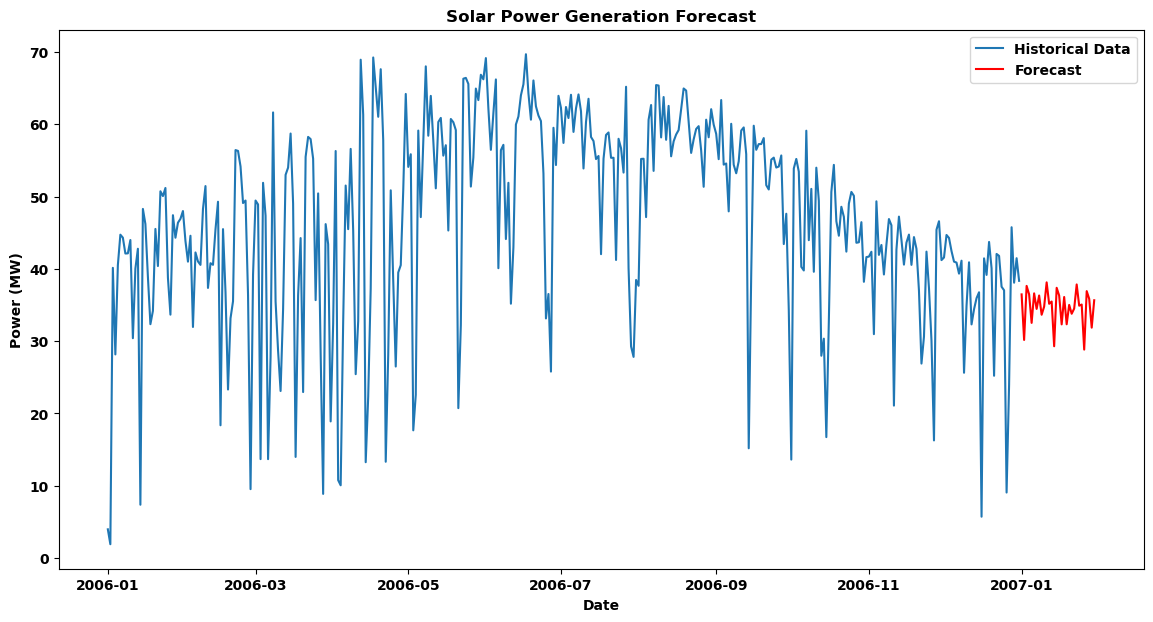

In [22]:
# Forecasting
forecast = sarimax_result.get_forecast(steps=30)  # Forecasting the next 30 days
forecast_mean = forecast.predicted_mean

# Plotting forecast
plt.figure(figsize=(14, 7))
plt.plot(grouped_data.index, grouped_data['Power(MW)'], label='Historical Data')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.title('Solar Power Generation Forecast')
plt.xlabel('Date')
plt.ylabel('Power (MW)')
plt.legend()
plt.show()


## Conclusion

This notebook presented a structured approach to forecasting solar power generation using time series analysis. The SARIMAX and GARCH models were employed to capture the time series characteristics and volatility, respectively. Future work could involve refining the model parameters and incorporating additional external variables to improve forecasting accuracy.
